# Proyek Analisis Data: E-Commere Public Dataset
- **Nama:** Agung Rashif Madani
- **Email:** agungrashif009@gmail.com
- **ID Dicoding:** armada

## Menentukan Pertanyaan Bisnis

- How does product delivery performance impact customer satisfaction?
- How does the geographic location of customers influence the popularity of product categories and sales performance in different regions?

## Import Semua Packages/Library yang Digunakan

In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
orders_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/orders_dataset.csv")
order_reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/order_reviews_dataset.csv")

In [4]:
print("Orders Dataset:")
orders_df.head()

Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
print("Order Reviews Dataset:")
order_reviews_df.head()

Order Reviews Dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/geolocation_dataset.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/customers_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/order_items_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/products_dataset.csv')

In [7]:
print("geolocation Dataset:")
geolocation_df.head()

geolocation Dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
print("Customers Dataset:")
customers_df.head()

Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
print("order_items Dataset:")
order_items_df.head()

order_items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
print("products Dataset:")
products_df.head()

products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- At first glance, several features in the datasets appear to contain NaN values, this indicates that not all orders have associated review comments or complete product category details.

### Assessing Data

In [11]:
print("\nAssessing Orders Dataset:")
print(orders_df.info())
print(orders_df.describe())

print("\nAssessing Order Reviews Dataset:")
print(order_reviews_df.info())
print(order_reviews_df.describe())

print("\nAssessing Geolocation Dataset:")
print(geolocation_df.info())
print(geolocation_df.describe())

print("\nAssessing Customers Dataset:")
print(customers_df.info())
print(customers_df.describe())

print("\nAssessing Order Items Dataset:")
print(order_items_df.info())
print(order_items_df.describe())

print("\nAssessing Products Dataset:")
print(products_df.info())
print(products_df.describe())



Assessing Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441

**Insight:**

Orders Dataset
- Missing values in several fields
- The order_status field shows that most orders are successfully delivered, with "delivered" being the most common status

Order Reviews Dataset
- The average review score is 4.08, with a median of 5, reflecting generally high customer satisfaction.
- The dataset also shows that many customers leave ratings without written feedback.

Geolocation Dataset
- No Missing value
- Latitude and longitude, have a broad range of values

Customers Dataset
- No Missing value

Order Items Dataset
- No Missing value
- The order_item_id column indicates that the most common value for this field is 1, meaning that most orders consist of a single item.

Products Dataset
- Some missing values in a few columns

### Cleaning Data

In [12]:
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])
orders_df = orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df = orders_df[orders_df['order_status'] != 'canceled']

order_reviews_df["review_comment_title"].fillna("No Title", inplace=True)
order_reviews_df["review_comment_message"].fillna("No Message", inplace=True)

products_df['product_category_name'].fillna('Unknown', inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

<ipython-input-12-5fc005a6017a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
<ipython-input-12-5fc005a6017a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df["review_comment

In [13]:
print("\nAssessing Orders Dataset:")
print(orders_df.info())
print(orders_df.describe())

print("\nAssessing Order Reviews Dataset:")
print(order_reviews_df.info())
print(order_reviews_df.describe())

print("\nAssessing Geolocation Dataset:")
print(geolocation_df.info())
print(geolocation_df.describe())

print("\nAssessing Customers Dataset:")
print(customers_df.info())
print(customers_df.describe())

print("\nAssessing Order Items Dataset:")
print(order_items_df.info())
print(order_items_df.describe())

print("\nAssessing Products Dataset:")
print(products_df.info())
print(products_df.describe())



Assessing Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None
            order_purchase_timestamp              order_approved_at  \
count                          96455                          964

**Insight:**

Orders Dataset
- The dataset now has 96,455 entries, down from 99,441.
- Timestamps are properly formatted as datetime objects.

Order Reviews Dataset
- The review without Title & Message is filled with "No Title" and "No Message"
- The dataset retains its original size (99,224 entries)

Products Dataset
- Filled missing values in columns like product_category_name, product_name_lenght, and others with median values or placeholders.

## Exploratory Data Analysis (EDA)

In [14]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [15]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [18]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Explore ...

In [17]:
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

merged_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,a54f0611adc9ed256b57ede6b6eb5114,4,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,e73b67b67587f7644d5bd1a52deb1b01,5,No Title,No Message,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,359d03e676b3c069f62cadba8dd3f6e8,5,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,e50934924e227544ba8246aeb3770dd4,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 13:02:51


In [18]:
print("Delivery Time Statistics by Order Status and Review Score:")
print(merged_df.groupby(['order_status', 'review_score'])['delivery_time'].describe())

Delivery Time Statistics by Order Status and Review Score:
                             count       mean        std  min  25%   50%  \
order_status review_score                                                  
delivered    1              9405.0  20.849973  16.060496  0.0  9.0  16.0   
             2              2940.0  16.194558  12.488589  1.0  8.0  13.0   
             3              7960.0  13.793342   9.943154  0.0  7.0  12.0   
             4             18983.0  11.848180   8.292216  0.0  7.0  10.0   
             5             57050.0  10.223050   6.822704  0.0  6.0   9.0   

                            75%    max  
order_status review_score               
delivered    1             30.0  195.0  
             2             22.0  208.0  
             3             18.0  188.0  
             4             15.0  194.0  
             5             13.0  187.0  


In [19]:
# Save dataframes as CSV
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/merged_df.csv', index=False)

**Insight:**
- As the review score decrease, the mean dealivery time is increase, and vice versa.
- The minimum delivery time is 0,and maximum delivery time is higher than i expected, which is above 150 days.

In [20]:
merged_df_2 = pd.merge(orders_df, customers_df, on='customer_id', how='left')
merged_df_2 = pd.merge(merged_df_2, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
merged_df_2 = pd.merge(merged_df_2, order_items_df, on='order_id', how='left')
merged_df_2 = pd.merge(merged_df_2, products_df, on='product_id', how='left')

merged_df_2.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
6,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
7,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
8,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
9,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [24]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16838631 entries, 0 to 16838630
Data columns (total 32 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
 8   delivery_time                  int64         
 9   customer_unique_id             object        
 10  customer_zip_code_prefix       int64         
 11  customer_city                  object        
 12  customer_state                 object        
 13  geolocation_zip_code_prefix    float64       
 14  geolocation_lat                float64       
 15  geolocation_l

In [21]:
merged_df_2['total_sales'] = merged_df_2['price'] + merged_df_2['freight_value']

region_sales = merged_df_2.groupby(['customer_state', 'product_category_name']).agg(
    total_sales=('total_sales', 'sum'),
    order_count=('order_id', 'nunique')
).reset_index()

In [26]:
sales_by_state = region_sales.groupby('customer_state')['total_sales'].sum()

sorted_sales = sales_by_state.sort_values(ascending=False)

sorted_sales.head(3)

,total_sales
customer_state,
SP,7.894631e+08
RJ,4.962430e+08
MG,4.557018e+08
RS,1.274796e+08
PR,9.729284e+07
SC,9.079087e+07
BA,7.126046e+07
ES,5.040751e+07
MT,2.649755e+07


In [27]:
sales_by_category = region_sales.groupby('product_category_name')['total_sales'].sum()

sorted_sales_category = sales_by_category.sort_values(ascending=False)

sorted_sales_category

,total_sales
product_category_name,
beleza_saude,2.064425e+08
cama_mesa_banho,1.995133e+08
relogios_presentes,1.817594e+08
esporte_lazer,1.746091e+08
informatica_acessorios,1.593561e+08
...,...
pc_gamer,2.603566e+05
casa_conforto_2,1.966244e+05
cds_dvds_musicais,9.469204e+04


In [22]:
sales_by_state_product = region_sales.groupby(['customer_state', 'product_category_name'])['total_sales'].sum().reset_index()

idx = sales_by_state_product.groupby('customer_state')['total_sales'].idxmax()

highest_sales_products = sales_by_state_product.loc[idx]

highest_sales_products_sorted = highest_sales_products.sort_values(by='product_category_name')
highest_sales_products_sorted

,customer_state,product_category_name,total_sales
819,PI,automotivo,594122.27
665,PA,beleza_saude,2681628.48
1239,SE,beleza_saude,718023.18
1004,RN,beleza_saude,704261.75
764,PE,beleza_saude,3176895.58
557,MS,beleza_saude,1045073.50
488,MG,beleza_saude,46702099.26
1353,TO,beleza_saude,457131.92
257,DF,beleza_saude,1650661.70
202,CE,beleza_saude,1936407.31


In [23]:
# Save dataframes as CSV
highest_sales_products_sorted.to_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/highest_sales_products_sorted.csv', index=False)

**Insight:**
- São Paulo (SP) leads in sales with 789 million, followed by Rio de Janeiro (RJ) and Minas Gerais (MG). Smaller states like Roraima (RR) and Acre (AC) have much lower sales, indicating regional disparities in consumer demand.
- Beleza_saude, cama_mesa_banho, and relogios_presentes generate the highest sales, reflecting strong consumer interest in personal care, home goods, and accessories.
- Beleza_saude products are popular across many states, while brinquedos and ferramentas_jardim are more specific to certain regions, suggesting localized preferences.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

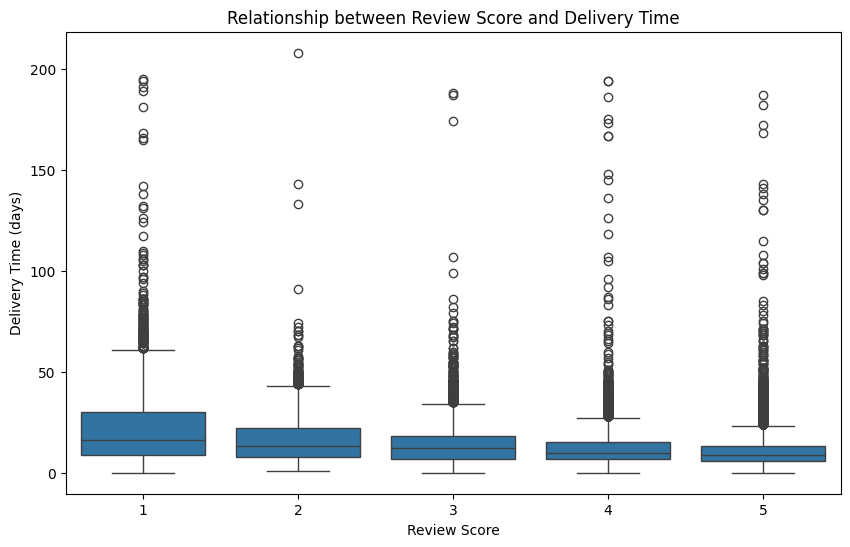

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_time', data=merged_df)
plt.title('Relationship between Review Score and Delivery Time')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.show()

### Pertanyaan 2:

In [30]:
import plotly.express as px

fig = px.bar(highest_sales_products_sorted, x='customer_state', y='total_sales', color='product_category_name',
             title='Total Sales by State and Product Category',
             labels={'customer_state': 'Customer State', 'total_sales': 'Total Sales', 'product_category_name': 'Product Category'})

fig.show()


## Analisis Lanjutan (Opsional)

<ipython-input-31-a67fa554fde6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Analysis of Delays for Low-Scoring Deliveries:
                count      mean        std    min   25%  50%  75%    max
order_status                                                            
delivered     20305.0 -7.348141  13.942207 -135.0 -15.0 -9.0 -1.0  188.0


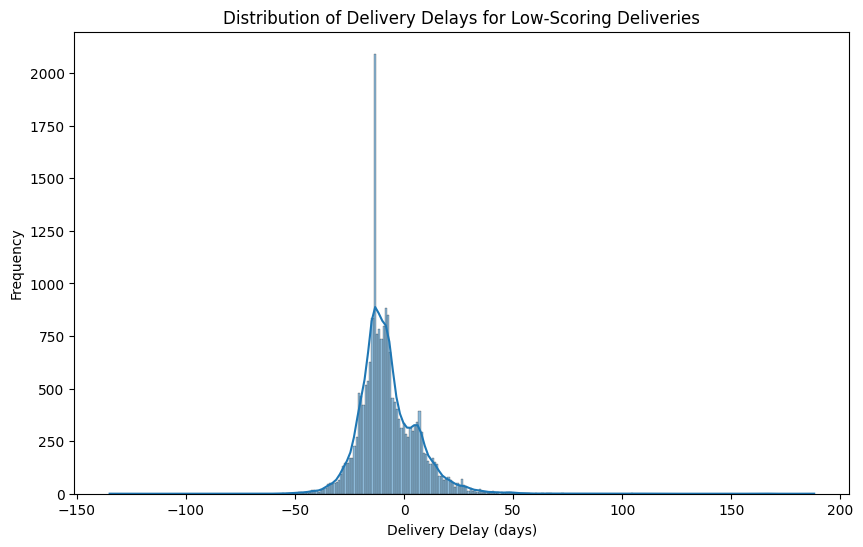

In [31]:
low_score_delays = merged_df[merged_df['review_score'] <= 3]

low_score_delays['delivery_delay'] = (low_score_delays['order_delivered_customer_date'] - low_score_delays['order_estimated_delivery_date']).dt.days

print("\nAnalysis of Delays for Low-Scoring Deliveries:")
print(low_score_delays.groupby('order_status')['delivery_delay'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(low_score_delays['delivery_delay'], kde=True)
plt.title('Distribution of Delivery Delays for Low-Scoring Deliveries')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.show()

- The mean delivery delay is -7.35 days. This indicates that, on average, deliveries are completed approximately 7 days earlier than expected.
- 75% of deliveries are made 1 day earlier or more.

## Conclusion

Business Question 1:
- Delivery time impacts review scores, with faster deliveries generally receiving higher ratings.
- However, even early deliveries receive low scores, suggesting additional factors need further analysis.
- Businesses should focus on these additional aspects alongside delivery performance to improve customer satisfaction comprehensively.

Business Question 2:
- Sales are concentrated in larger states, led by São Paulo, with smaller states showing much lower demand.
- Key categories include Beleza_saude, cama_mesa_banho, and relogios_presentes, with localized demand for categories like brinquedos and ferramentas_jardim.
- Businesses could address regional disparities by tailoring marketing strategies and expanding regionally preferred categories to underserved areas.